In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [4]:
from numpy.random import rand, randn

In [5]:
n, d, k = 100, 2, 2

In [6]:
np.random.seed(20)
X = rand(n, d)
#print(X)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

print(means)

S = np.diag(rand(d))
print(S)
print([S])

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([ 0.69872366,  0.75176984]), array([ 0.25997411,  0.14504062])]
[[ 0.01764816  0.        ]
 [ 0.          0.06360523]]
[array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]])]
[array([ 0.69872366,  0.75176984]), array([ 0.25997411,  0.14504062])]
[array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]]), array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]])]


Solution
===


In [21]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    probs = np.zeros((X.shape[0]))
    d = X.shape[1]
    multiplier = (1/(np.sqrt(2*(np.pi**d)*np.linalg.det(sigma))))
    for i,x in enumerate(X):
        print(x)
        print(mean)
        exponent = -np.matmul(np.matmul(np.transpose(x-mean),np.linalg.inv(sigma)),(x-mean))/2
        print(multiplier*np.exp(exponent))
        probs[i] = multiplier*np.exp(exponent)
    return probs
    

In [22]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

[ 0.5881308   0.89771373]
[ 0.69872366  0.75176984]
4.01820358898
[ 0.89153073  0.81583748]
[ 0.69872366  0.75176984]
2.2689288358
[ 0.03588959  0.69175758]
[ 0.69872366  0.75176984]
2.56499859402e-05
[ 0.37868094  0.51851095]
[ 0.69872366  0.75176984]
0.240543881127
[ 0.65795147  0.19385022]
[ 0.69872366  0.75176984]
0.554752550118
[ 0.2723164   0.71860593]
[ 0.69872366  0.75176984]
0.0385734169124
[ 0.78300361  0.85032764]
[ 0.69872366  0.75176984]
5.08953824447
[ 0.77524489  0.03666431]
[ 0.69872366  0.75176984]
0.102179168684
[ 0.11669374  0.7512807 ]
[ 0.69872366  0.75176984]
0.000456107842196
[ 0.23921822  0.25480601]
[ 0.69872366  0.75176984]
0.00243273462597
[ 0.85762553  0.94977903]
[ 0.69872366  0.75176984]
2.41382083093
[ 0.56168686  0.17878052]
[ 0.69872366  0.75176984]
0.298750373362
[ 0.77025193  0.49238104]
[ 0.69872366  0.75176984]
3.42440655962
[ 0.63125307  0.83949792]
[ 0.69872366  0.75176984]
5.55842620792
[ 0.4610394   0.49794007]
[ 0.69872366  0.75176984]
0.816890

In [23]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


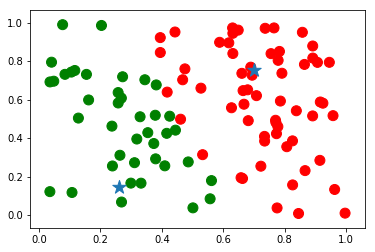

In [24]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()